## Emotion analysis and classification of short comments using machine learning techniques
+ Code developed by: Douglas Maia dos Santos
+ Github acess: https://github.com/m-dougl/emotion-analysis

##### Importing libraries for proper code functioning
###### OBS: Code depends on functions stored in emotion_analysis.py
+ Scikit-Learn or Sklearn: Library that provides the models used for classifications, as well as methods and metrics to evaluate them
+ Natural Language Toolkit or NLTK: Library used to perform some text pre-processing steps, such as the removal of stopwords and text tokenization
+ Pandas: Library used to organize and manipulate dataset working with objects in the DataFrame format that allows you to visualize changes in an organized way
+ Matplotlib and Seaborn: Libraries for graphical visualizations of data
+ Emotion_analysis: Python file where all useful functions have been organized to make the task of sorting comments easier

In [24]:

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from unicodedata import normalize

import pandas as pd
import nltk
import numpy as np
import string
import emotion_analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords')
plt.style.use('seaborn')

[nltk_data] Downloading package rslp to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hit-
[nltk_data]     notebook3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Dataset import and emotion analysis
+ Using pandas library stored in function "open_dataset" to read dataset
+ Pie chart plot to check the predominance of emotions

In [25]:
df = emotion_analysis.open_dataset('dataset.xlsx', 'xlsx')
df.Emoção = df.Emoção.str.lower()
df.Comentarios= df.Comentarios.str.lower()

([<matplotlib.patches.Wedge at 0x7fec24ef04f0>,
 [Text(0.08978947552266688, 1.0963292617117197, 'alegria'),
  Text(-0.7527104957410681, -0.8021389590346774, 'tristeza'),
  Text(0.8609035714920814, -0.6847226011986013, 'surpresa')],
 [Text(0.04897607755781829, 0.5979977791154835, '47.4%'),
  Text(-0.4105693613133098, -0.4375303412916422, '31.2%'),
  Text(0.469583766268408, -0.373485055199237, '21.4%')])

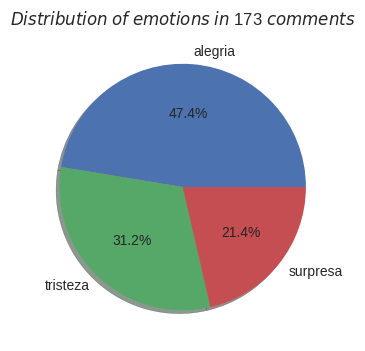

In [26]:
emotions = Counter(df.Emoção)
plt.figure(figsize=(9, 4))
plt.title(f'$Distribution $ $of$ $emotions$ $in$ {len(list(df.Emoção))} $comments$')
plt.pie(x=emotions.values(), labels=emotions.keys(),
        shadow=True, autopct='%1.1f%%')

##### Data pre-processing stage
+ 1 - Removal of special characters
+ 2 - Removal of accents contained in words
+ 3 - Text tokenization
+ 4 - Removel of stopwords contained in comments
+ 5 - Text untokenization
+ 6 - Reduction of the word to its root (Stemming)

In [27]:
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_characters)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_accents)
df.Comentarios = df.Comentarios.apply(emotion_analysis.tokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.remove_stopwords)
df.Comentarios = df.Comentarios.apply(emotion_analysis.untokenize)
df.Comentarios = df.Comentarios.apply(emotion_analysis.stemming)

##### Transformation of comments into a numerical matrix using TFIDF-Vectorizer or CountVectorizer methods
Check emotion_analysis file for more information about the parameters of this function

In [28]:
X, y = df.Comentarios, df.Emoção
X = emotion_analysis.vectorizer(X, 'tfidf')

##### Separation of the amout of training and test data
The variable X stores the numerical matrix and the variable y stores the emotions of the dataset. In this case, we choose the proportion of 80% data for training and 20% for testing our models, these values can be freely tested by user
+ If you choose to use the "simple_train" function, the models will be trained without parameter optimization of the GridSearchCV
+ If you choose to use the "cv_train" models will be trained taking cross-validation into account

In [29]:
train_size = .8
X_train, X_test, y_train, y_test = emotion_analysis.dataset_split(X, y, train_size)

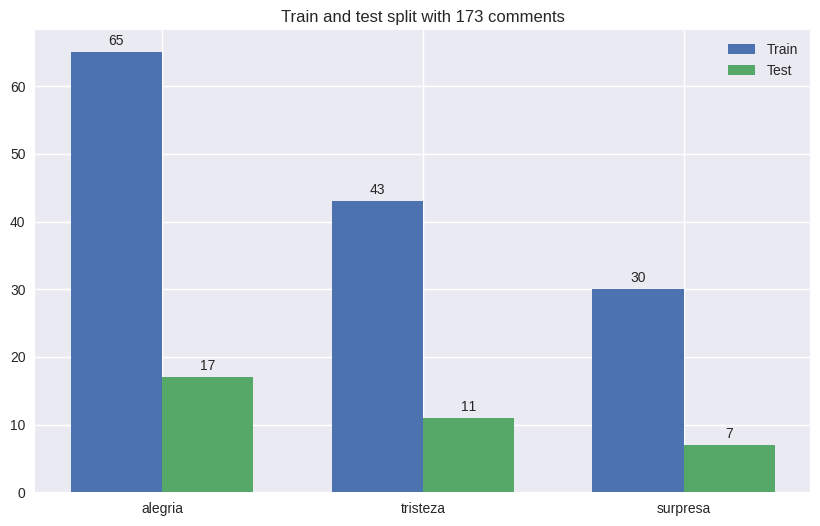

In [30]:
labels =  ['ALEGRIA', 'TRISTEZA', 'SURPRESA']
emotion_analysis.emotion_plot(y_train, y_test, emotions)

In [31]:
n_fold = 10
NB  = emotion_analysis.cv_train(classifier_name='NB',  X=X_train, y= y_train, n_fold=n_fold)
SVM = emotion_analysis.cv_train(classifier_name='SVM', X=X_train, y= y_train, n_fold=n_fold)
KNN = emotion_analysis.cv_train(classifier_name='KNN', X=X_train, y= y_train, n_fold=n_fold)

pred_nb  = NB.predict(X_test)   # Naive Bayes prediction
pred_svm = SVM.predict(X_test)  # SVM prediction
pred_knn = KNN.predict(X_test)  # KNN prediction

Naive Bayes best parameters: {'alpha': 100, 'fit_prior': False}
Naive Bayes best accuracy in 10 folds: 70.93406593406594
Support Vector Machine best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Support Vector Machine best accuracy in 10 folds: 67.47252747252747
K-Nearest Neighbors best parameters: {'algorithm': 'auto', 'n_neighbors': 6}
K-Nearest Neighbors best accuracy in 10 folds: 59.45054945054945


##### Evaluating the models
+ Confusion Matrix
+ Accuracy
+ Precision
+ Recall 
+ F1-Score
+ AUC Score

+ Confusion Matrix

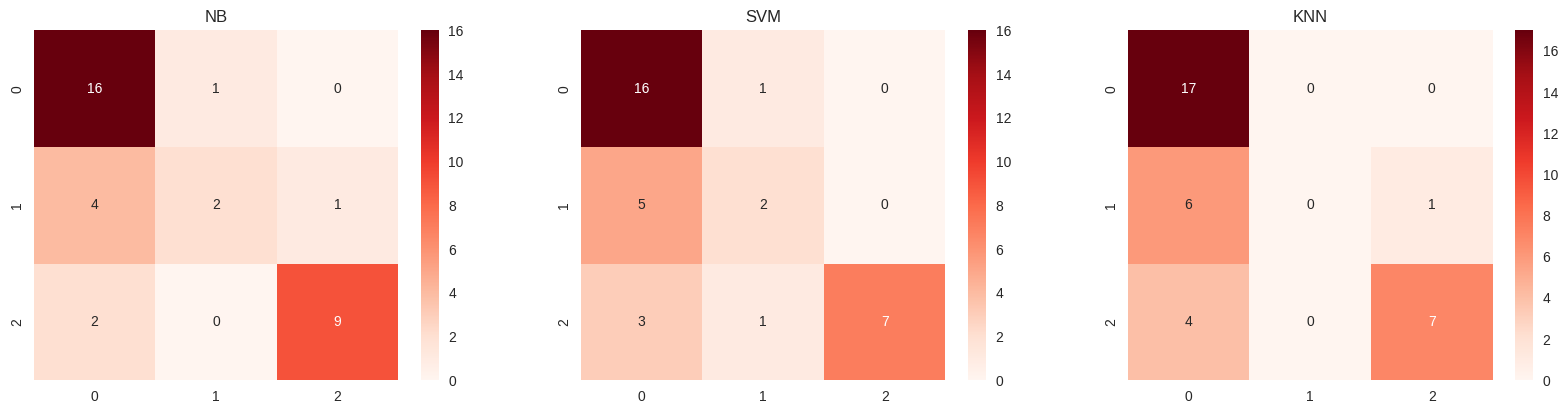

In [34]:
list_predict = [pred_nb, pred_svm, pred_knn]
models_names = ['NB', 'SVM', 'KNN']
'''OBS:
        0 = ALEGRIA
        1 = SURPRESA
        2 = TRISTEZA
'''
emotion_analysis.confusion_matrix_plot(list_predict = list_predict,
                                  models_names = models_names, 
                                  y_true       = y_test)

+ Accuracy, Precision, Recall and F1-Score

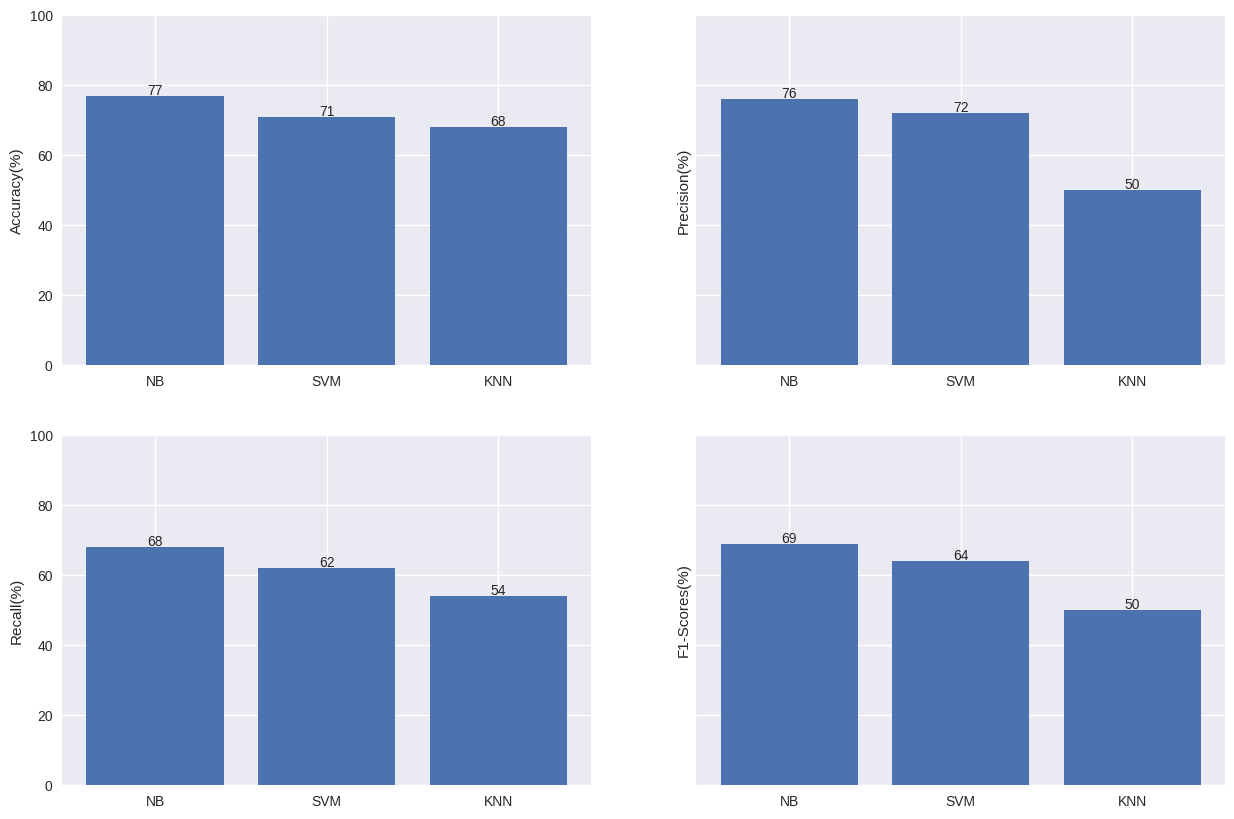

In [35]:
emotion_analysis.metrics_evaluation(models_names=models_names,
                   list_predict=list_predict,
                   y_true = y_test)